In [19]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
# Cтруктура данных: записываются для каждого пользователя, совершившего покупки, каждый день
# для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
# внутри каждой папки есть файл data.csv, где и хранятся данные

#  Задача: собрать все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов
# (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date) (соответствует 
# названию папки, где лежит папка с пользователем)

In [3]:
# Сначала посмотрим содержимое основной папки 'Data'

path_to_data = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-hodzitskij/shared/homeworks/python_ds_miniprojects/4/data'
folders_in_data = os.listdir(path_to_data)
folders_in_data

['2020-12-05',
 '2020-12-08',
 '2020-12-09',
 '2020-12-04',
 '2020-12-06',
 '2020-12-03',
 '2020-12-07']

In [4]:
# Создадим пустой датафрейм, в который будем собирать маленькие датафреймы из файлов
main_df = pd.DataFrame()


# Создадим вложенный цикл, чтобы найти полный путь до каждого из CSV файлов

for folder in folders_in_data:
    folders_in_date = os.listdir(path_to_data + '/' + folder)
    for folder_2 in folders_in_date:
        files_in_name = os.listdir(path_to_data + '/' + folder + '/' + folder_2)
        for file in files_in_name:
            final_path = path_to_data + '/' + folder + '/' + folder_2 + '/' + file 
            # в переменной 'final_path' сохраняется путь до каждого из CSV файлов
            final_df = pd.read_csv(final_path)
            
            # добавим в каждый маленький датафрейм колонки date и name, информацию о которых возьмем из названия папок
            name = final_path.split('/')[-2]
            date = final_path.split('/')[-3]
            final_df['name'] = name
            final_df['date'] = date
            
            main_df = pd.concat([main_df, final_df])
            #добавляем каждый маленький датафрейм к основному датафрейму
            
main_df = main_df.reset_index(drop=True).drop('Unnamed: 0', axis=1)
main_df

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07


In [5]:
# Альтернативно можно было воспользоваться ф-цией walk, которая бы выдала нам пути до всех конечных файлов в папке Data
tree = os.walk(path_to_data)
for path in tree:
    print(path)

('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-hodzitskij/shared/homeworks/python_ds_miniprojects/4/data', ['2020-12-05', '2020-12-08', '2020-12-09', '2020-12-04', '2020-12-06', '2020-12-03', '2020-12-07'], [])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-hodzitskij/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05', ['Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Smirnov', 'Kirill_Smirnov', 'Alexey_Fedorov', 'Alexey_Petrov'], [])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-hodzitskij/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov', [], ['data.csv'])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-hodzitskij/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov', [], ['data.csv'])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-hodzitskij/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov', [], ['data.csv'])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-hodzitskij/shared/homeworks/python_ds_miniprojects

In [6]:
# Найдем имена пользователей, которые купили наибольшее число товаров

quantity_per_user = main_df.groupby('name').quantity.sum()
max_quantity = quantity_per_user.max()
best_users = quantity_per_user.loc[quantity_per_user == max_quantity].index.sort_values()
best_users

Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')

In [7]:
# Альтернативный вариант выполнение предыдущей задачи

# purchases_per_user = (main_df.groupby('name')
#                            .agg({'quantity': 'sum'})
#                            .sort_values(by='quantity', ascending=False)
#                     )
#purchases_per_user

In [8]:
# Найдем топ-10 товаров по числу проданных единиц за всё время

quantity_per_product = (main_df.groupby('product_id', as_index = False)
                        .quantity
                        .sum()
                        .sort_values(by='quantity', ascending=False)
                        .iloc[0:10]
                        .reset_index(drop=True)
)
quantity_per_product

,product_id,quantity
0,27,20
1,56,18
2,24,15
3,74,15
4,41,14
5,34,13
6,94,13
7,66,13
8,92,12
9,50,12


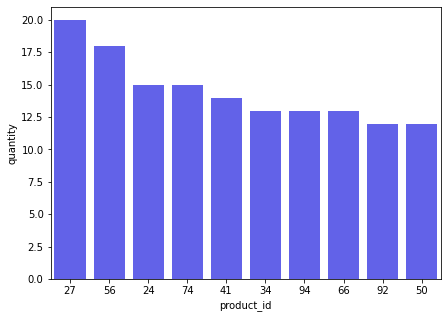

In [24]:
# Визуализируем полученный результат

plt.figure(figsize=(7, 5))
sns.barplot(x='product_id', y='quantity', data=quantity_per_product, color='blue', alpha=0.7, order=quantity_per_product.product_id)

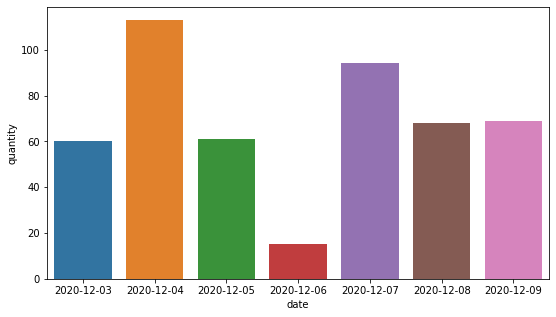

In [32]:
# Также посмотрим на продажи по дням и визуализируем их

sales_per_day = (main_df.groupby('date', as_index=False)
                 .quantity
                 .sum()
)

plt.figure(figsize=(9,5))
sns.barplot(data=sales_per_day, x='date', y='quantity')

In [52]:
# Найдем количество пользователей, которые приобрели один и тот же товар повторно (одинаковый product_id в разные дни)

# Сначала удалим дупликаты по имении, продукты и дате
main_df_no_duplicates = main_df.drop_duplicates(subset=['name', 'product_id', 'date'])
main_df_no_duplicates.head(10)

# Сделаем датафрейм с повторными покупками, для кадого пользователя
uniq_purchases_df = (main_df_no_duplicates.groupby(['name', 'product_id'], as_index=False )
                           .date
                           .count()
                    )

# Посчитаем сколько пользователей сделали более 1 повторной покупки
uniq_purchases_n = uniq_purchases_df.loc[uniq_purchases_df.date >= 2].shape[0]
uniq_purchases_n

2

In [55]:
# более простой способ решить предыдущую задачу:

same_product = main_df.groupby(['name', 'product_id']).date.nunique()
same_product.loc[same_product > 1]

name          product_id
Anton_Ivanov  15            2
Petr_Fedorov  94            2
Name: date, dtype: int64